In [1]:
from pylab import *
import pandas as pd
from task_1 import linear_approximation, rbf, least_squares_approx, plot_approx
from scipy.spatial.distance import cdist

# Part 1

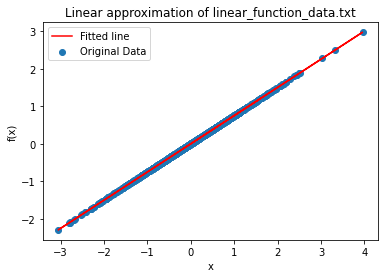

In [2]:
df_A = pd.read_csv("datasets/linear_function_data.txt", names=["x", "f(x)"],delim_whitespace=True)
linear_approximation(df_A, rcond=None, name="linear_function_data")

# Part 2

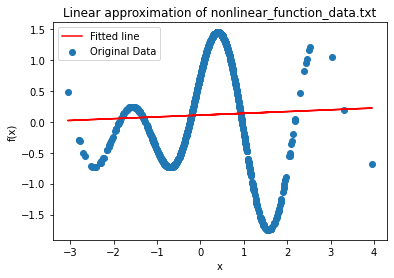

In [3]:
df_B = pd.read_csv("datasets/nonlinear_function_data.txt", names=["x", "f(x)"],delim_whitespace=True)
linear_approximation(df_B, rcond=None, name="nonlinear_function_data")

# Part 3

In [4]:
L = 5
e = 0.05
xl = df_B.iloc[:, 1:].sample(n=L)

In [5]:
C,epsilon = least_squares_approx(df_B, xl, e, rcond=None)
# creating xi values 
xi = np.linspace(df_B['x'].min(),df_B['x'].max(),len(df_B)).reshape(-1, 1)
# calculating distance matrix
dist_i = cdist(xi,xl)
# calculating phi using the radial basis function
phi_i = rbf(dist_i, epsilon)
# prediction
fx_predicted = phi_i@C

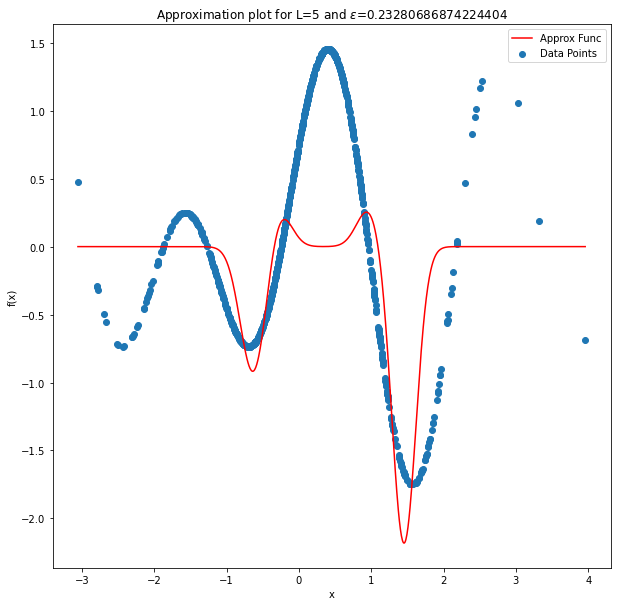

In [6]:
plot_approx(df_B, xi, fx_predicted, L, epsilon)

# Hyperparameter Tuning

In [7]:
L_values = [l for l in range(1, 101)]
e_values = [e * 0.01 for e in range(1, 51)]

In [8]:
min_residual = None
C_min = None
epsilon_min = None
xl_min = None
e_min = None
l_min = None
for l in L_values:
    xl = df_B.iloc[:, 1:].sample(n=l)
    for e in e_values:
        C,epsilon, residual = least_squares_approx(df_B, xl, e, rcond=1000, return_res=True)
        
        if min_residual is None or residual < min_residual:
            min_residual = residual
            C_min = C
            epsilon_min = epsilon
            xl_min = xl
            e_min = e
            l_min = l
            
    


<ipython-input-8-fca39c5f29ce>:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if min_residual is None or residual < min_residual:


In [9]:
xi = np.linspace(df_B['x'].min(),df_B['x'].max(),len(df_B)).reshape(-1, 1)
dist_i_min = cdist(xi,xl_min)
phi_i_min = rbf(dist_i_min, epsilon_min)
fx_predicted_min = phi_i_min@C_min

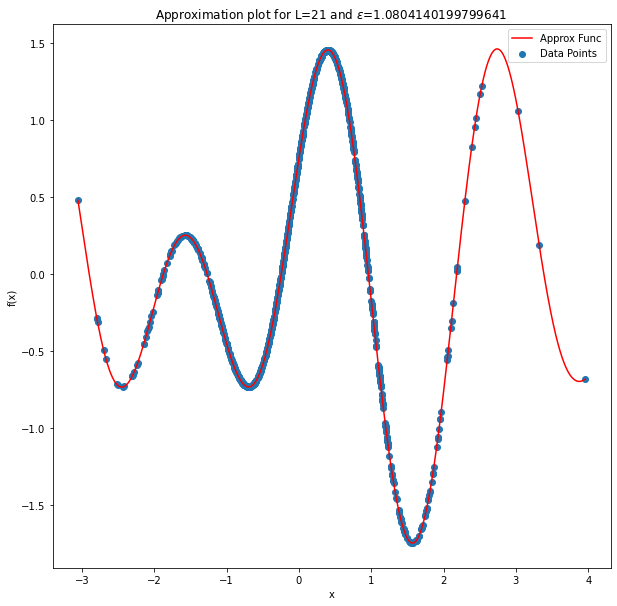

In [14]:
plot_approx(df_B, xi, fx_predicted_min, l_min, epsilon_min)

# Radial basis function with Dataset A

In [11]:
L = 10
e = 0.4
xl = df_A.iloc[:, 1:].sample(n=L)

In [12]:
C,epsilon = least_squares_approx(df_A, xl, e, rcond=None)
# prediction
xi = np.linspace(df_A['x'].min(),df_A['x'].max(),len(df_A)).reshape(-1, 1)
dist_i = cdist(xi,xl)
phi_i = rbf(dist_i, epsilon)
fx_predicted = phi_i@C

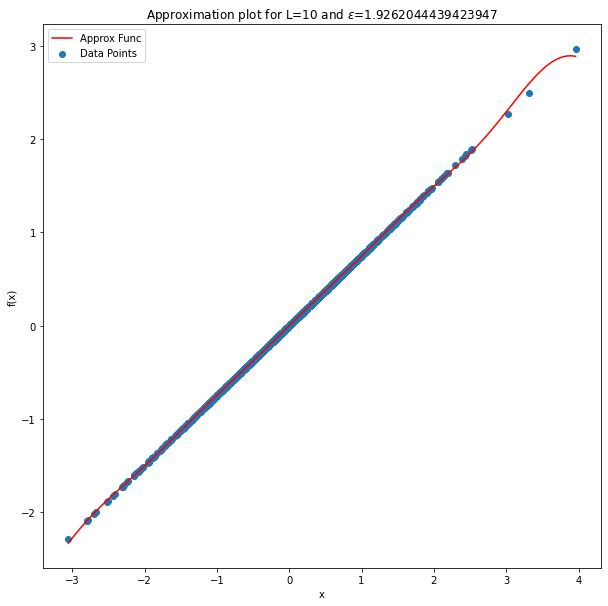

In [13]:
plot_approx(df_A, xi, fx_predicted, L, epsilon)